In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

## Load data

In [2]:
df = pd.read_csv('data/data_3.csv',index_col=[0],parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70 entries, 1949-01-01 to 2018-01-01
Data columns (total 18 columns):
primary-energy                  69 non-null float64
gdp                             69 non-null float64
population                      69 non-null float64
PPIACO                          70 non-null float64
miles-per-vehicle               68 non-null float64
crude_oil                       69 non-null float64
natural-gas                     64 non-null float64
pri-energy-production           69 non-null float64
Electricity-price               69 non-null float64
coal-price                      63 non-null float64
Energy-export                   69 non-null float64
Energy-import                   69 non-null float64
Heating-degree                  69 non-null float64
Cooling-degree                  69 non-null float64
CO2                             69 non-null float64
renewable                       69 non-null float64
Vehicle-fuel-economy            68 non-null f

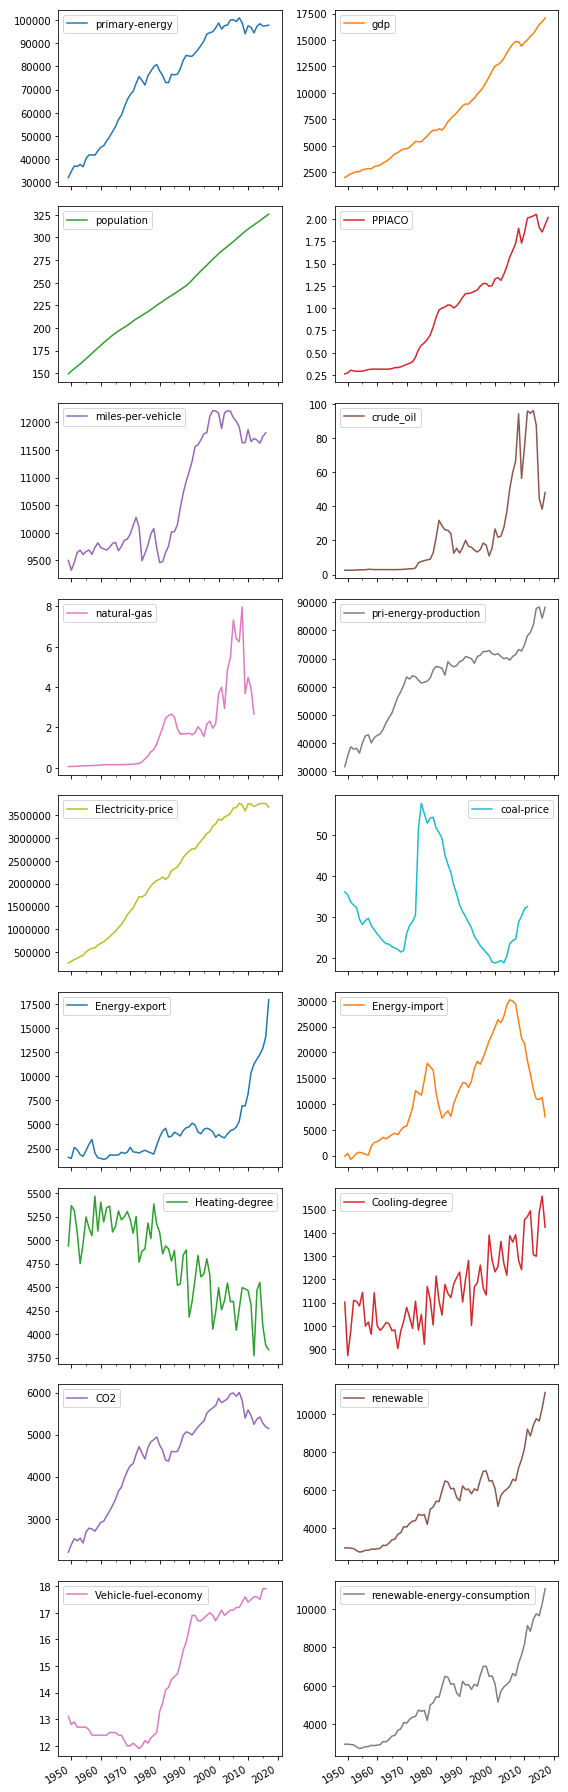

In [3]:
df.plot(subplots=True,figsize=(8,25),layout=(9,2))
plt.tight_layout()
plt.show()

**Data includes primary energy consumption (Y variable) and other 17 features (X)**

In [4]:
df.head()

,primary-energy,gdp,population,PPIACO,miles-per-vehicle,crude_oil,natural-gas,pri-energy-production,Electricity-price,coal-price,Energy-export,Energy-import,Heating-degree,Cooling-degree,CO2,renewable,Vehicle-fuel-economy,renewable-energy-consumption
1949-01-01,31981.503,2008.9,149.2,0.263083,9498.0,2.54,0.06,31722.160,254511.334,36.14,1591.760,-143.602,4938.0,1101.0,2206.691,2973.984,13.1,2973.984
1950-01-01,34615.768,2184.0,152.3,0.273417,9321.0,2.51,0.07,35540.384,291443.326,35.41,1465.322,447.565,5367.0,871.0,2382.046,2977.718,12.8,2977.718
1951-01-01,36974.030,2360.0,154.9,0.304250,9460.0,2.53,0.07,38750.615,330284.583,33.67,2621.545,-729.119,5315.0,974.0,2526.687,2958.464,12.9,2958.464
1952-01-01,36747.825,2456.1,157.6,0.296000,9642.0,2.53,0.08,37916.913,356163.960,32.97,2365.131,-219.147,5085.0,1109.0,2473.374,2940.181,12.7,2940.181
1953-01-01,37664.468,2571.4,160.2,0.291750,9684.0,2.68,0.09,38180.796,396216.896,32.34,1866.013,447.029,4749.0,1105.0,2536.893,2831.460,12.7,2831.460


In [5]:
features = pd.DataFrame(df.columns)

## Objective 
is to determine the important feature and reduce the number of engineering features that affects the primary energy consumption

In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 1949-01-01 to 2011-01-01
Data columns (total 18 columns):
primary-energy                  63 non-null float64
gdp                             63 non-null float64
population                      63 non-null float64
PPIACO                          63 non-null float64
miles-per-vehicle               63 non-null float64
crude_oil                       63 non-null float64
natural-gas                     63 non-null float64
pri-energy-production           63 non-null float64
Electricity-price               63 non-null float64
coal-price                      63 non-null float64
Energy-export                   63 non-null float64
Energy-import                   63 non-null float64
Heating-degree                  63 non-null float64
Cooling-degree                  63 non-null float64
CO2                             63 non-null float64
renewable                       63 non-null float64
Vehicle-fuel-economy            63 non-null f

## Pearson correlation coefficient

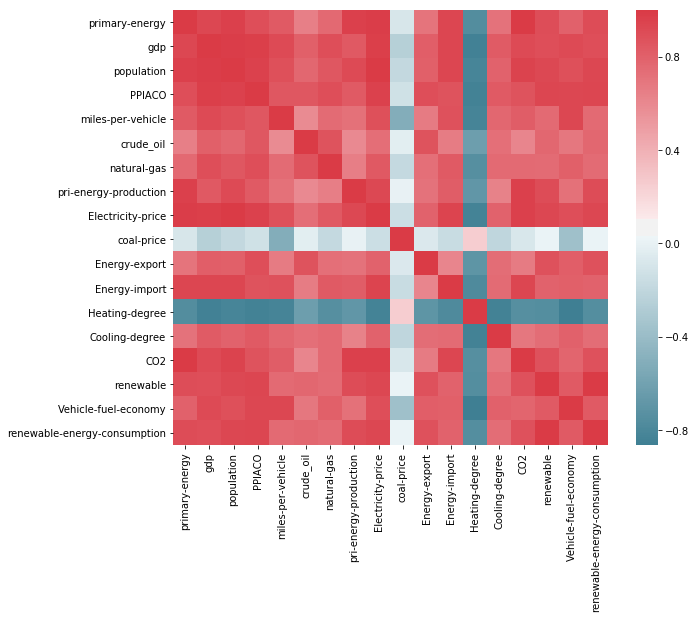

In [7]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square = True)

## Split data

In [8]:
x_train = df.iloc[:45,1:]
y_train = df.iloc[:45,0]

x_test = df.iloc[45:,1:]
y_test = df.iloc[45:,0]

In [9]:
x_train.shape

(45, 17)

In [10]:
x_test.shape

(18, 17)

## Random forest

In [11]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
y_test_encoded = lab_enc.fit_transform(y_test)

In [12]:
from sklearn import utils
print(y_train_encoded)
print(utils.multiclass.type_of_target(y_train_encoded))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_train_encoded))

[ 0  1  4  3  5  2  6  8  9  7 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 28 27 23 29 34 37 38 35 30 26 25 32 31 33 36 39 42 41 40 43 44]
multiclass
multiclass
multiclass


In [13]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(n_estimators=500,random_state=1) 
## Fit the model on training data.
rf.fit(x_train, y_train_encoded) 
## And score it on testing data.
rf.score(x_test, y_test_encoded)

0.0

In [14]:
rf.score(x_train,y_train_encoded)

1.0

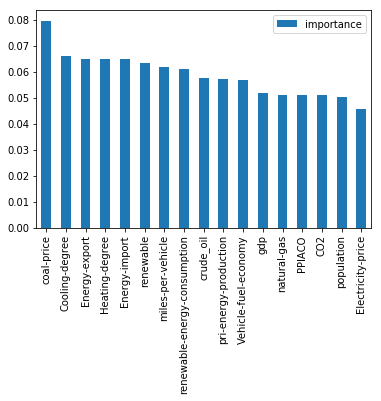

In [15]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot(kind='bar')

### Try to use ExtraTrees

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

Feature ranking:
1. feature 10 (0.062455)
2. feature 13 (0.061455)
3. feature 2 (0.061455)
4. feature 3 (0.061000)
5. feature 8 (0.060818)
6. feature 14 (0.060455)
7. feature 11 (0.059909)
8. feature 12 (0.059273)
9. feature 1 (0.058818)
10. feature 16 (0.058364)
11. feature 9 (0.058364)
12. feature 7 (0.057545)
13. feature 0 (0.057455)
14. feature 6 (0.057182)
15. feature 5 (0.056727)
16. feature 4 (0.055364)
17. feature 15 (0.053364)


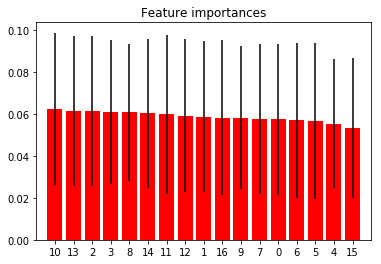

In [17]:
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(x_train, y_train_encoded)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [18]:
forest.score(x_train,y_train_encoded)

1.0

In [19]:
forest.score(x_test,y_test_encoded)

0.0

### Scale data and use Random forest

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
rf1 = RandomForestClassifier(n_estimators=500,random_state=1) 
## Fit the model on training data.
rf1.fit(x_train_scaled, y_train_encoded) 
## And score it on testing data.
rf1.score(x_test_scaled, y_test_encoded)

0.0

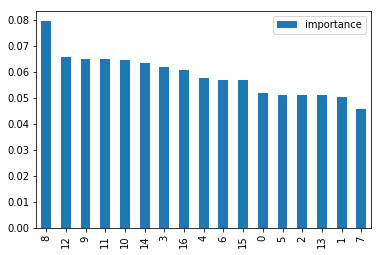

In [23]:
feature_importances_1 = pd.DataFrame(rf1.feature_importances_,
                                   index = pd.DataFrame(x_train_scaled).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances_1.plot(kind='bar')

In [24]:
features

,0
0,primary-energy
1,gdp
2,population
3,PPIACO
4,miles-per-vehicle
5,crude_oil
6,natural-gas
7,pri-energy-production
8,Electricity-price
9,coal-price


## Regularization with Ridge and Lasso regressions

In [25]:
def plotModelResults(model, X_train=x_train, X_test=x_test, plot_intervals=False, plot_anomalies=False, scale=1.96):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(10, 8))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_squared_error")
        #mae = cv.mean() * (-1)
        deviation = np.sqrt(cv.std())
        
        lower = prediction - (scale * deviation)
        upper = prediction + (scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

    
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, x_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(10, 8))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

### RidgeCV

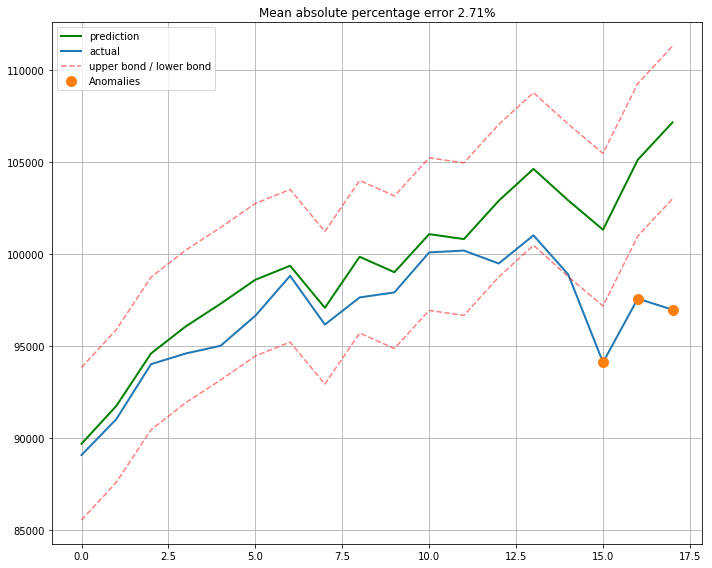

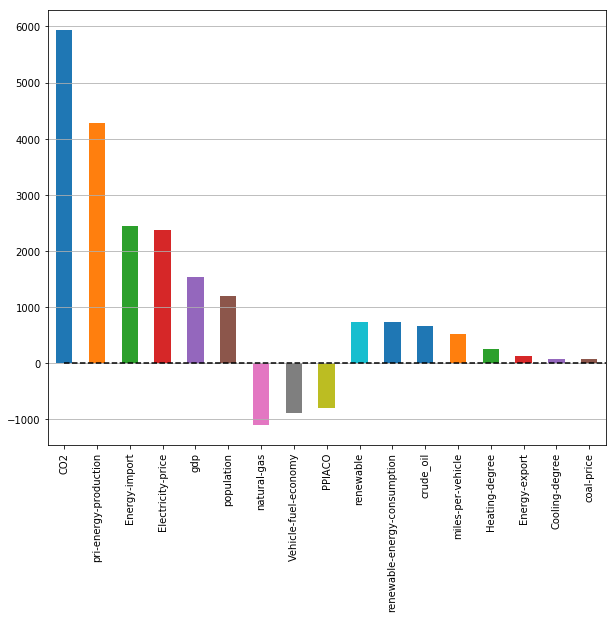

In [26]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score

tscv = TimeSeriesSplit(n_splits=5)

ridge = RidgeCV(cv=tscv)
ridge.fit(x_train_scaled, y_train)

plotModelResults(ridge, 
                 X_train=x_train_scaled, 
                 X_test=x_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

### LassoCV

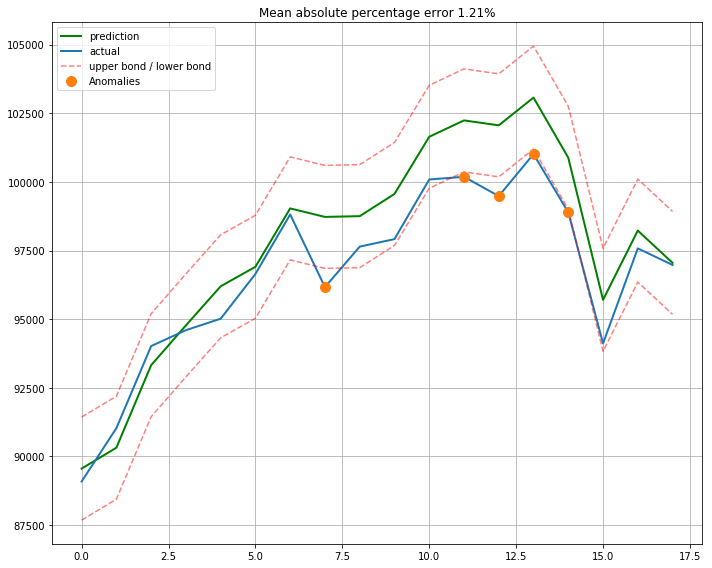

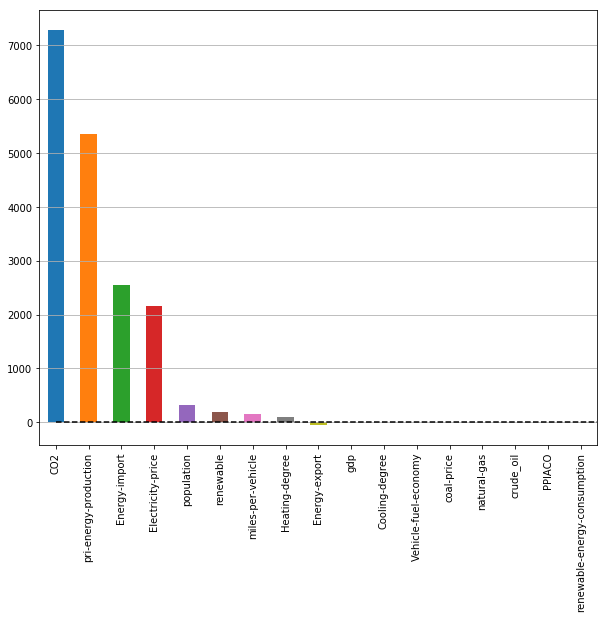

In [27]:
lasso = LassoCV(cv=tscv)
lasso.fit(x_train_scaled, y_train)

plotModelResults(lasso, 
                 X_train=x_train_scaled, 
                 X_test=x_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lasso)

## xgboost

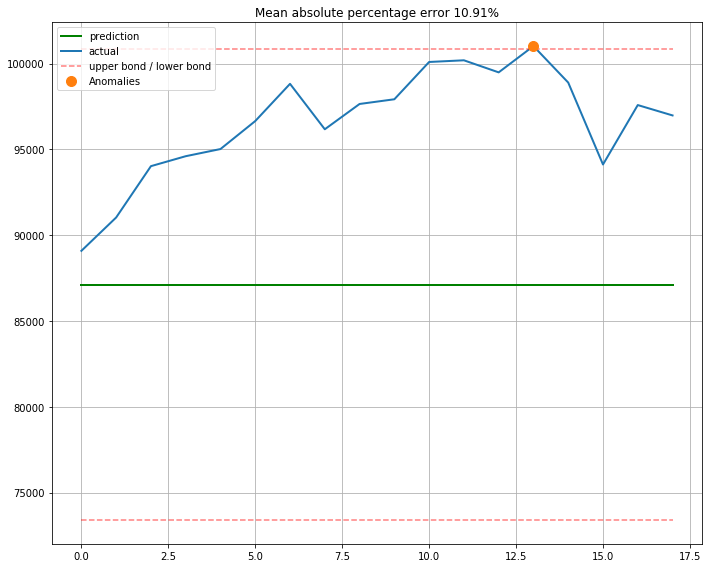

In [28]:
from xgboost import XGBRegressor 

xgb = XGBRegressor()
xgb.fit(x_train_scaled, y_train)

plotModelResults(xgb, 
                 X_train=x_train_scaled, 
                 X_test=x_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


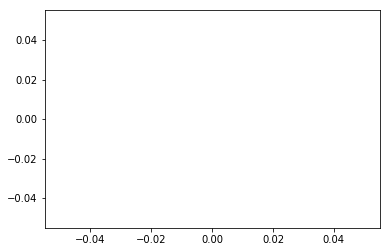

In [29]:
# plot feature importance manually

from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train,y_train)
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

## Stationary test

In [30]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):           
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [31]:
features = x_train.columns
for i,j in enumerate(features):
    print(str(i) + '. Series of ' + j)
    test_stationarity(x_train[j])
    print('')

0. Series of gdp
Results of Dickey-Fuller Test:
Test Statistic                  2.336359
p-value                         0.998977
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64

1. Series of population
Results of Dickey-Fuller Test:
Test Statistic                  0.131711
p-value                         0.968161
#Lags Used                      2.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

2. Series of PPIACO
Results of Dickey-Fuller Test:
Test Statistic                 -0.065985
p-value                         0.952723
#Lags Used                      3.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.9

**All features are non-stationary.**

In [32]:
# make a differencing
x_train_1 = x_train.diff().dropna()
x_train_1.head()

,gdp,population,PPIACO,miles-per-vehicle,crude_oil,natural-gas,pri-energy-production,Electricity-price,coal-price,Energy-export,Energy-import,Heating-degree,Cooling-degree,CO2,renewable,Vehicle-fuel-economy,renewable-energy-consumption
1950-01-01,175.1,3.1,0.010333,-177.0,-0.03,0.01,3818.224,36931.992,-0.73,-126.438,591.167,429.0,-230.0,175.355,3.734,-0.3,3.734
1951-01-01,176.0,2.6,0.030833,139.0,0.02,0.00,3210.231,38841.257,-1.74,1156.223,-1176.684,-52.0,103.0,144.641,-19.254,0.1,-19.254
1952-01-01,96.1,2.7,-0.008250,182.0,0.00,0.01,-833.702,25879.377,-0.70,-256.414,509.972,-230.0,135.0,-53.313,-18.283,-0.2,-18.283
1953-01-01,115.3,2.6,-0.004250,42.0,0.15,0.01,263.883,40052.936,-0.63,-499.118,666.176,-336.0,-4.0,63.519,-108.721,0.0,-108.721
1954-01-01,-14.5,2.8,0.000833,-79.0,0.10,0.01,-1662.366,27946.896,-2.87,-169.712,204.546,215.0,-20.0,-114.640,-77.361,0.0,-77.361


In [33]:
for i,j in enumerate(features):
    print(str(i) + '. Series of ' + j)
    test_stationarity(x_train_1[j])
    print('')

0. Series of gdp
Results of Dickey-Fuller Test:
Test Statistic                 -4.934407
p-value                         0.000030
#Lags Used                      0.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

1. Series of population
Results of Dickey-Fuller Test:
Test Statistic                 -1.484537
p-value                         0.541146
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64

2. Series of PPIACO
Results of Dickey-Fuller Test:
Test Statistic                 -2.368254
p-value                         0.150898
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.9

feature 2,3,5,8,15,16,17 are not stationary after diff(1)

### Make other transformations for non-stationary time series

In [34]:
test_stationarity(x_train['population'].apply(np.log))

Results of Dickey-Fuller Test:
Test Statistic                 -0.509188
p-value                         0.890211
#Lags Used                      2.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [35]:
test_stationarity(x_train['population'].apply(np.sqrt))

Results of Dickey-Fuller Test:
Test Statistic                 -0.317869
p-value                         0.922935
#Lags Used                      2.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [36]:
# cube root
test_stationarity(x_train['population'].apply(np.cbrt).diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -1.418577
p-value                         0.573339
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [37]:
test_stationarity(x_train['population'].apply(np.log).apply(np.sqrt))

Results of Dickey-Fuller Test:
Test Statistic                 -0.523809
p-value                         0.887286
#Lags Used                      2.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [38]:
test_stationarity(x_train['population'].apply(np.log).diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -1.430866
p-value                         0.567393
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [39]:
test_stationarity(x_train['population'].diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -1.484537
p-value                         0.541146
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [40]:
test_stationarity(x_train['population'].diff().dropna().apply(np.log))

Results of Dickey-Fuller Test:
Test Statistic                 -1.593123
p-value                         0.487047
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [41]:
test_stationarity(x_train['PPIACO'].apply(np.log))

Results of Dickey-Fuller Test:
Test Statistic                 -0.643786
p-value                         0.860778
#Lags Used                      3.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [42]:
test_stationarity(x_train['PPIACO'].apply(np.log).diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -2.411738
p-value                         0.138451
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [43]:
test_stationarity(x_train['PPIACO'].apply(np.sqrt))

Results of Dickey-Fuller Test:
Test Statistic                 -0.357972
p-value                         0.916883
#Lags Used                      3.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [44]:
test_stationarity(x_train['PPIACO'].diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -2.368254
p-value                         0.150898
#Lags Used                      2.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [45]:
test_stationarity(x_train['crude_oil'].apply(np.log))

Results of Dickey-Fuller Test:
Test Statistic                 -0.711940
p-value                         0.843633
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


In [46]:
test_stationarity(x_train['crude_oil'].diff(2).dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -3.748255
p-value                         0.003483
#Lags Used                      3.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


In [47]:
test_stationarity(x_train['Electricity-price'].diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -4.834811
p-value                         0.000047
#Lags Used                      1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [48]:
test_stationarity(x_train['Electricity-price'].apply(np.log))

Results of Dickey-Fuller Test:
Test Statistic                -7.319581e+00
p-value                        1.203989e-10
#Lags Used                     0.000000e+00
Number of Observations Used    4.400000e+01
Critical Value (1%)           -3.588573e+00
Critical Value (5%)           -2.929886e+00
Critical Value (10%)          -2.603185e+00
dtype: float64


In [49]:
test_stationarity(x_train['renewable'].diff(4).dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -2.544064
p-value                         0.105118
#Lags Used                      0.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64


In [50]:
test_stationarity(x_train['renewable'].apply(np.log).diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                -7.574740e+00
p-value                        2.780849e-11
#Lags Used                     0.000000e+00
Number of Observations Used    4.300000e+01
Critical Value (1%)           -3.592504e+00
Critical Value (5%)           -2.931550e+00
Critical Value (10%)          -2.604066e+00
dtype: float64


In [51]:
test_stationarity(x_train['renewable-energy-consumption'].diff(2).dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -4.898403
p-value                         0.000035
#Lags Used                      1.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [52]:
test_stationarity(x_train['renewable-energy-consumption'].apply(np.log).diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                -7.574650e+00
p-value                        2.782292e-11
#Lags Used                     0.000000e+00
Number of Observations Used    4.300000e+01
Critical Value (1%)           -3.592504e+00
Critical Value (5%)           -2.931550e+00
Critical Value (10%)          -2.604066e+00
dtype: float64


---

In [53]:
test_stationarity(x_train['Vehicle-fuel-economy'].diff(2).dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -2.006835
p-value                         0.283584
#Lags Used                      3.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


In [54]:
test_stationarity(x_train['Vehicle-fuel-economy'].apply(np.log).diff(3).dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -1.434517
p-value                         0.565621
#Lags Used                      3.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


In [55]:
test_stationarity(x_train['Vehicle-fuel-economy'].apply(np.sqrt).diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -4.030625
p-value                         0.001258
#Lags Used                      0.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


## It seems to be that features **['population'] ['PPIACO'] and ['Vehicle-fuel-economy']** can not transformed into stationary series.